# Problem 1

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# For randomized data splitting
from sklearn.model_selection import train_test_split

## 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

## 2. Linear Discriminat Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [79]:
from sklearn import metrics

# calculate accuracy measures and confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [6]:
df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.
4

In [7]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [8]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


The 'Unnamed: 0' can be dropped. The 'vote', 'gender' need to be converted to categorical based on the data dictionary provided.

In [10]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [13]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [17]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

There are no null values in the dataset provided.

In [34]:
for i in df.columns:
    if df[i].dtype == 'int64':
        all_integers = (df[i] % 1 == 0).all()
        if all_integers:
            print(f'{i} observations are integers.')
        else:
            print(f'{i} may contain non-integers observations.')


age observations are integers.
economic.cond.national observations are integers.
economic.cond.household observations are integers.
Blair observations are integers.
Hague observations are integers.
Europe observations are integers.
political.knowledge observations are integers.


All the observations in the int64 type are truly int64

Text(0.5, 1.0, 'Bar Chart of age')

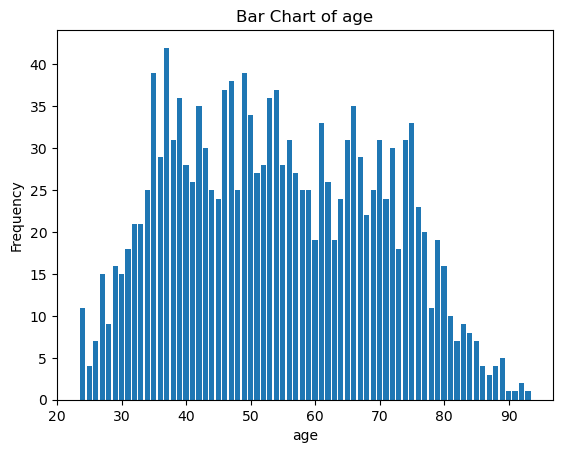

In [72]:
value_counts = df['age'].value_counts()
plt.figure()
plt.bar(value_counts.index, value_counts.values)
# Set the x-axis limits
plt.xlim(left=20)

plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Bar Chart of age')

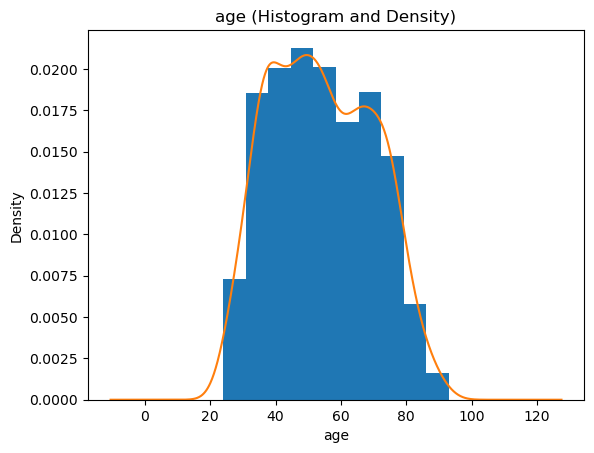

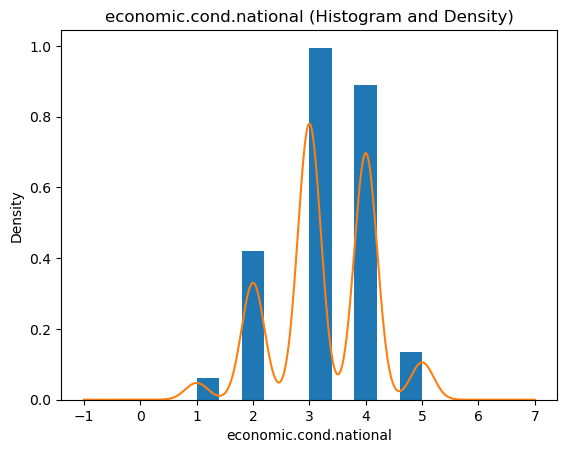

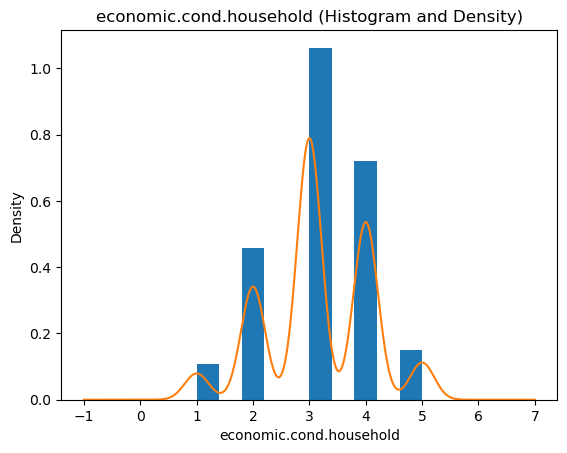

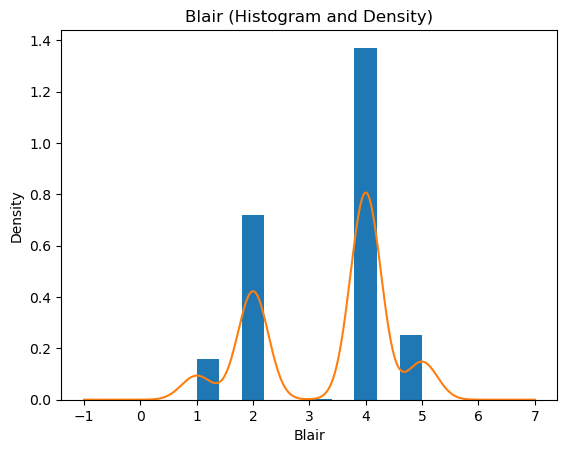

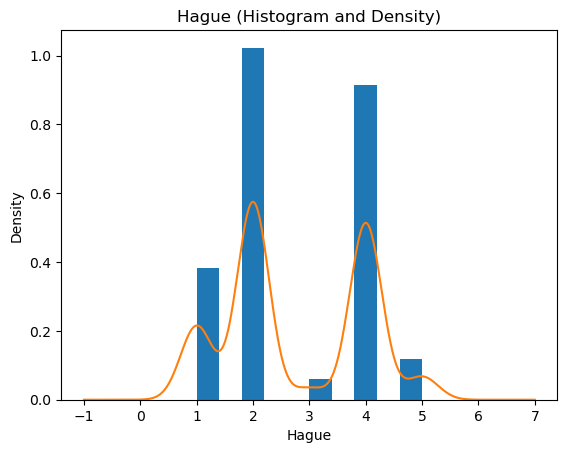

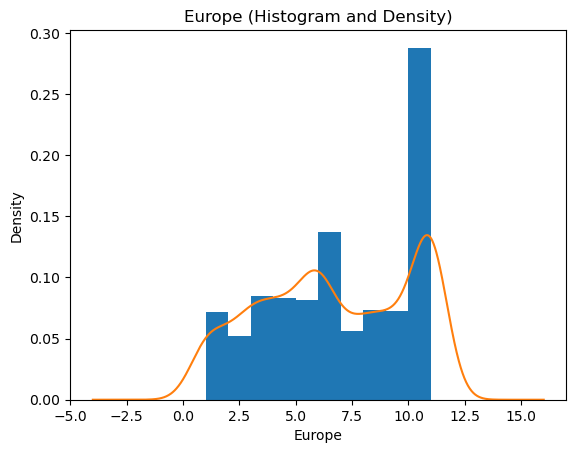

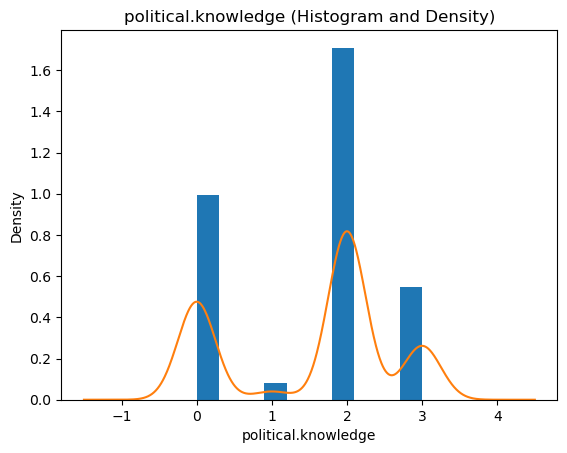

In [49]:
# Plotting histogram for each column
plt.figure()
for i in df.columns:
    if df[i].dtype=='int64':
        df[i].plot(kind='hist', density=True)
        df[i].plot(kind='kde', title=f"{i} (Histogram and Density)")
        plt.xlabel(i)
        plt.show()

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.
7

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


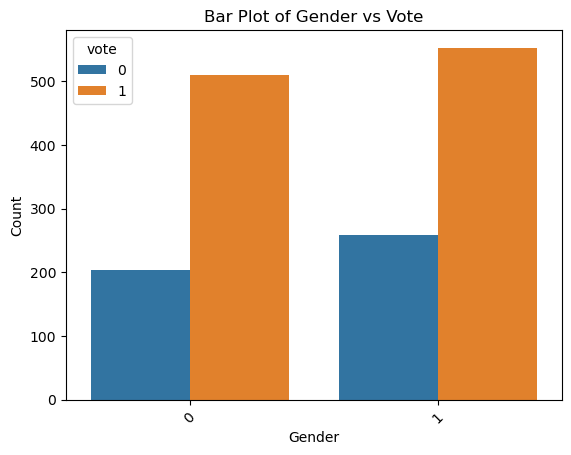

In [76]:
# Create the bar plot
sns.countplot(data=df, x='gender', hue='vote')
# Set the labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot of Gender vs Vote')
plt.xticks(rotation=45)
plt.show()

In [55]:
df[['vote','gender']].value_counts()

vote          gender
Labour        female    553
              male      510
Conservative  female    259
              male      203
dtype: int64

Quick bivariate analysis on Vote & Gender suggests that majority of votes are with Labour party. Within the party votes, there is no major parity on how either gender votes on a party

In [ ]:
## We are coding up the 'gender' variable in #female as 1, male 0
df['gender']=np.where(df['gender'] =='female', '1', df['gender'])
df['gender']=np.where(df['gender'] =='male', '0', df['gender'])
df['gender'] = df['gender'].astype('int64')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

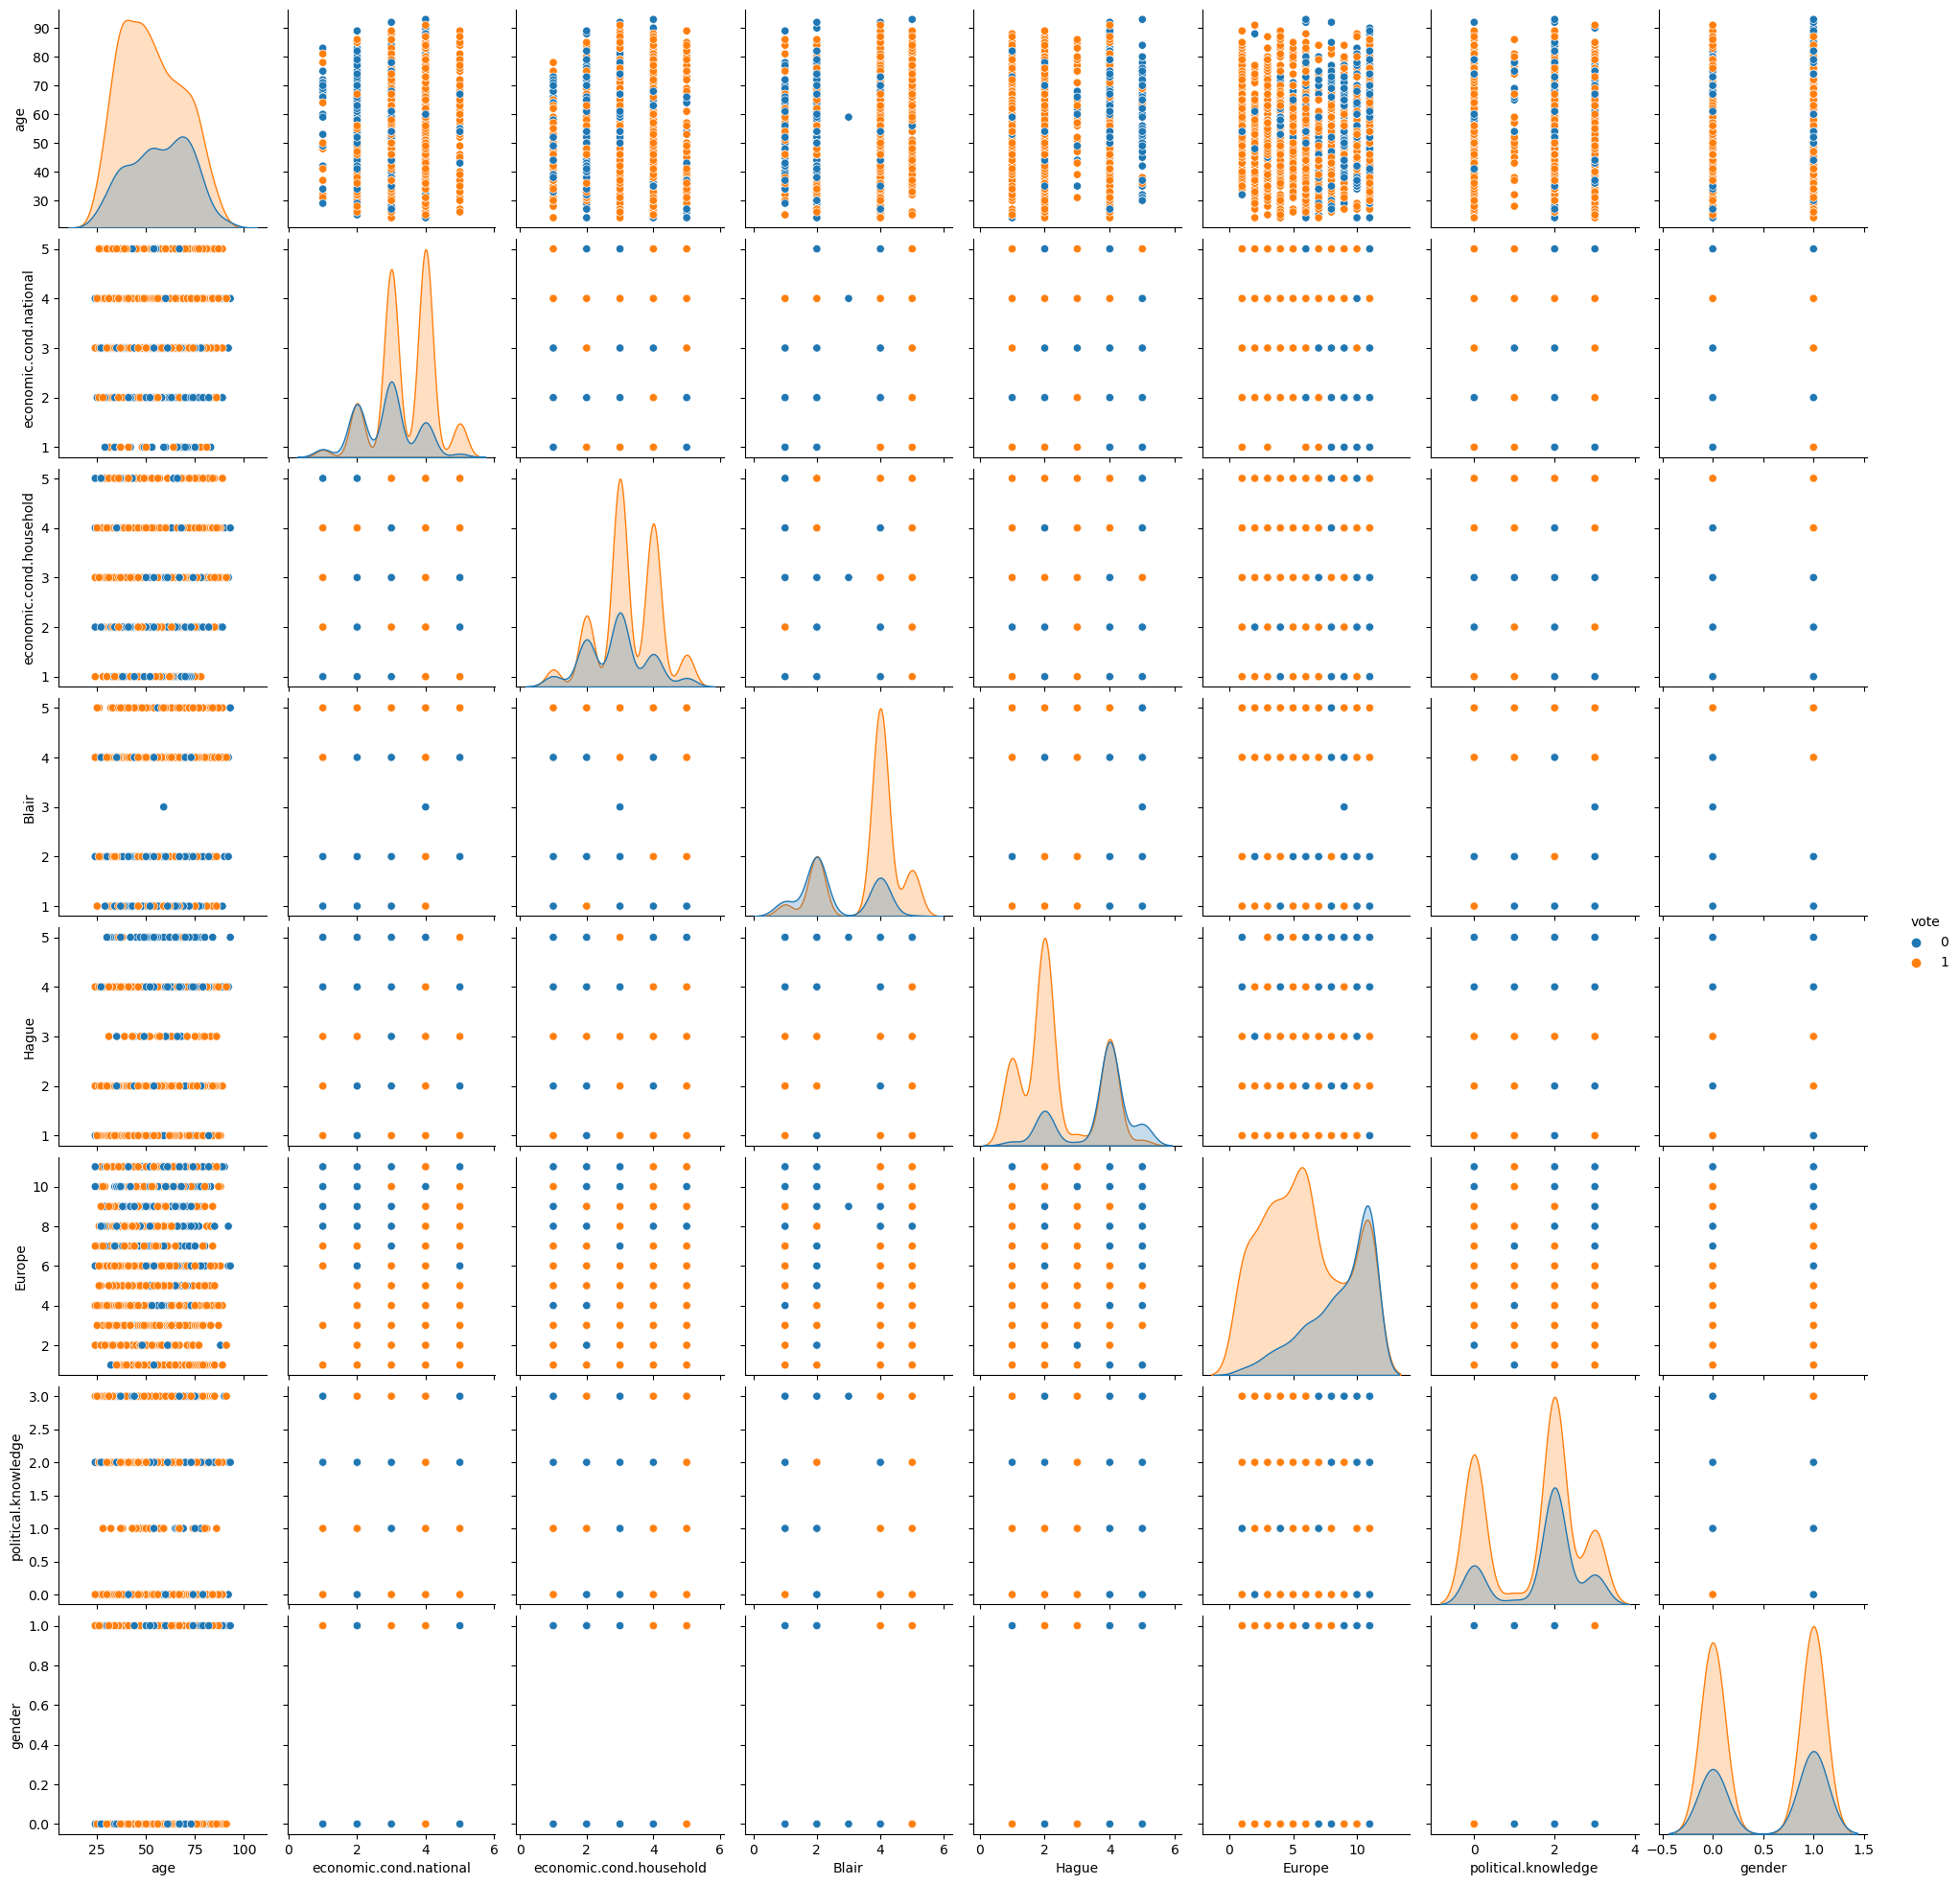

In [73]:
sns.pairplot(df, hue='vote', diag_kind='kde');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.
4

In [60]:
df['vote'].value_counts()

1    1063
0     462
Name: vote, dtype: int64

In [57]:
## We are coding up the 'vote' variable in #Labour as 1, Conservative 0
df['vote']=np.where(df['vote'] =='Labour', '1', df['vote'])
df['vote']=np.where(df['vote'] =='Conservative', '0', df['vote'])

In [63]:
df['vote'] = df['vote'].astype('int64')

In [64]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,1
1,1,36,4,4,4,4,5,2,0
2,1,35,4,4,5,2,3,2,0
3,1,24,4,2,2,1,4,0,1
4,1,41,2,2,1,1,6,2,0


In [65]:
df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,0,67,5,3,2,4,11,3,0
1521,0,73,2,2,4,4,8,2,0
1522,1,37,3,3,5,4,2,2,0
1523,0,61,3,3,1,4,11,2,0
1524,0,74,2,3,2,4,11,0,1


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1525.0,0.697049,0.459685,0.0,0.0,1.0,1.0,1.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525.0,0.532459,0.499109,0.0,0.0,1.0,1.0,1.0


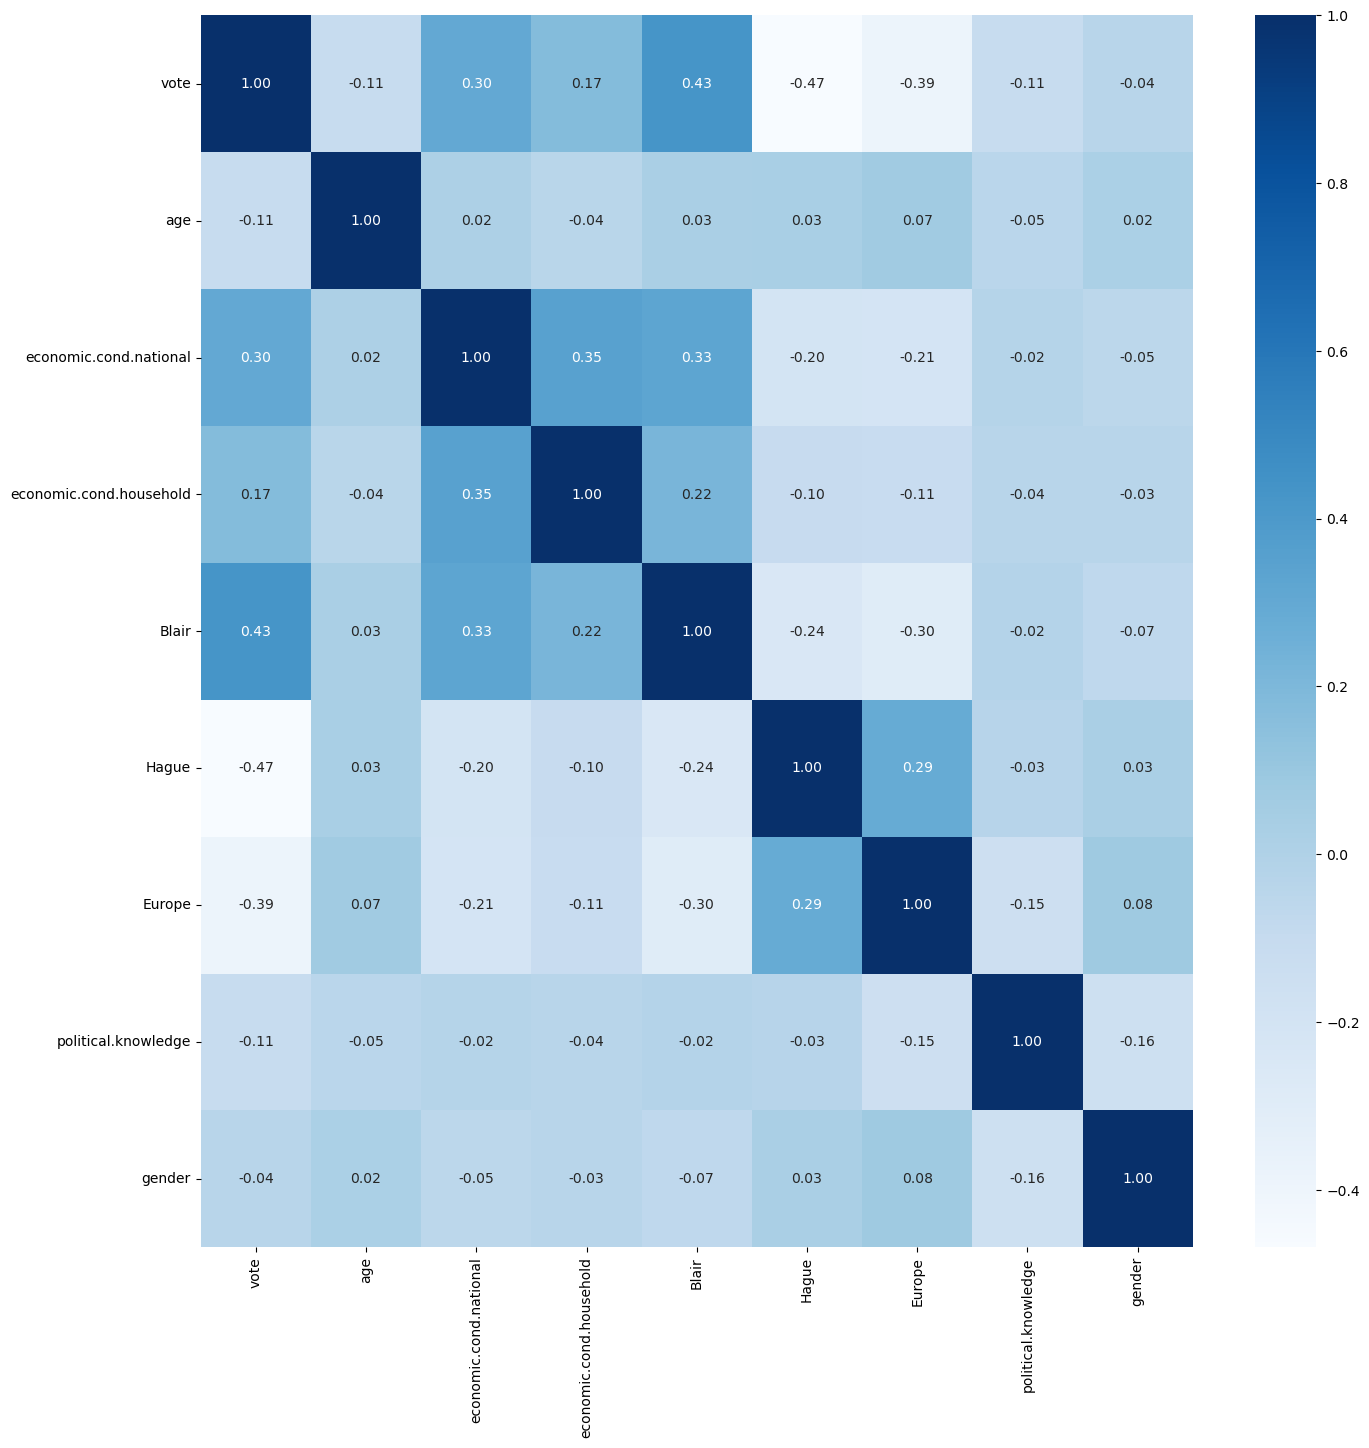

In [68]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

Scaling is not needed for the categorical variables.  Scaling is beneficial on the 'age' variable as the observations,min, max are higher in magnitude compared to corresponding values in other features. StandardScaler can be used for just 'age' variable.

Alternately, 'age' can be binned with labels from 0,1,2,3 & no scaling will be required on any of the variables.

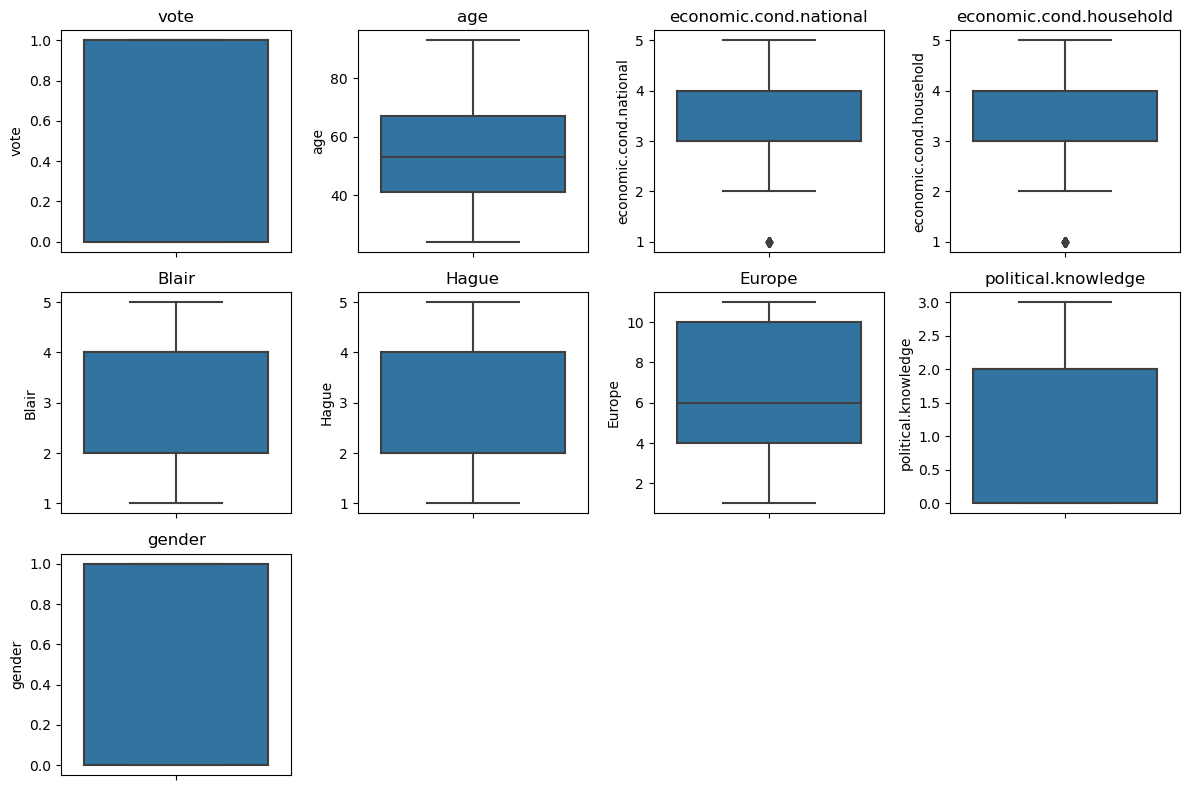

In [67]:
plt.figure(figsize = (12,8))
feature_list = df.columns

for i in range(len(feature_list)):
        plt.subplot(3,4, i + 1)
        sns.boxplot(y = df[feature_list[i]], data = df)
        plt.title(feature_list[i])
        plt.tight_layout()

1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)
4

In [83]:
def conf_mat(y_test, y_predict):
    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(6, 4))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Contraception Yes', 'Contraception No']
    plt.title('Confusion Matrix - Test Data for {} Model'.format(model))
    plt.ylabel('Actual (True) label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    plt.xticks(rotation=45)
    s = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]))
    plt.show()

In [85]:
# define empty lists to contain the performance metrics:

model_names = []
accuracy_train = []
accuracy_test = []
confusion_train = []
confusion_test = []
report_train = []
report_test = []
roc_auc_train = []
roc_auc_test =[]

In [80]:
X= df.drop(['vote'], axis=1)
y= df['vote']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= .3, random_state= 1, stratify=y)

In [81]:
# Define the models
models = [('Logistic Regression', LogisticRegression(max_iter=1000)),
          ('LDA', LinearDiscriminantAnalysis(n_components=1))]

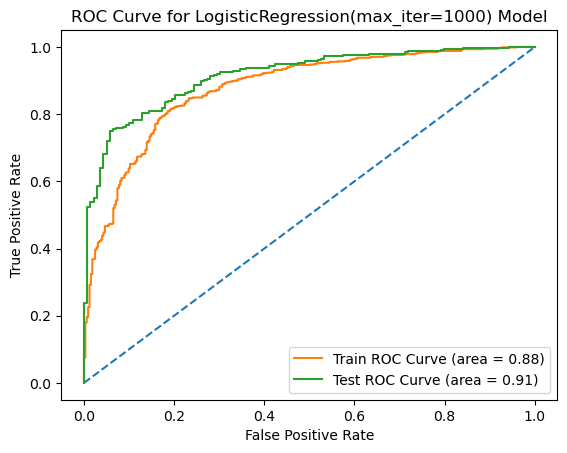

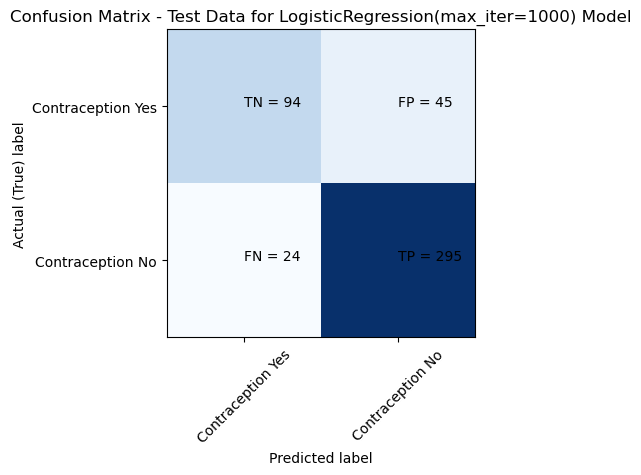

Model:  Logistic Regression
Confusion Matrix for Train Data:
[[210 113]
 [ 69 675]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       323
           1       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067

-----------------------
Model:  Logistic Regression
Confusion Matrix for Test Data:
[[ 94  45]
 [ 24 295]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458

-----------------------


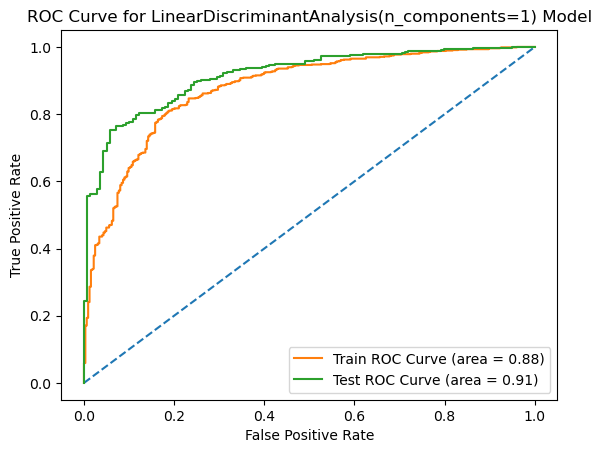

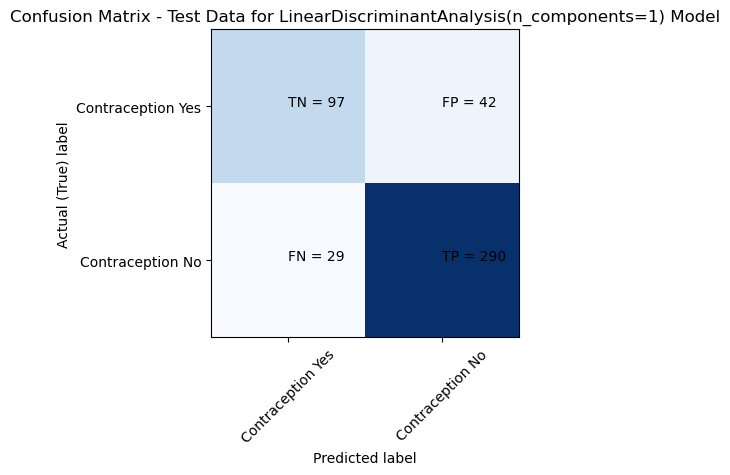

Model:  LDA
Confusion Matrix for Train Data:
[[215 108]
 [ 78 666]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       323
           1       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067

-----------------------
Model:  LDA
Confusion Matrix for Test Data:
[[ 97  42]
 [ 29 290]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458

-----------------------


In [86]:
# loop through the models
for name, model in models:

    # fit the model on the training data
    model.fit(X_train, y_train)

    # predict the training and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # calculate the performance metrics

    accuracy_train_score = accuracy_score(y_train, y_pred_train)
    accuracy_test_score = accuracy_score(y_test, y_pred_test)
    confusion_train_score = confusion_matrix(y_train, y_pred_train)
    confusion_test_score = confusion_matrix(y_test, y_pred_test)
    report_train_score = classification_report(y_train, y_pred_train)
    report_test_score = classification_report(y_test, y_pred_test)

    # Get the predicted probabilities for train and test data
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the roc_auc_score for train and test data
    train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
    test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot ROC curves
    plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % train_roc_auc_score)
    plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % test_roc_auc_score)


    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for {} Model".format(model))
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot Confusion Matrix
    conf_mat(y_test, y_pred_test)
    
    # Print the confusion matrix and classification report for train data
    print('Model: ', name)
    print('Confusion Matrix for Train Data:')
    print(confusion_matrix(y_train, y_pred_train))
    print('Classification Report for Train Data:')
    print(classification_report(y_train, y_pred_train))
    print('-----------------------')
    
    # Print the confusion matrix and classification report for test data
    print('Model: ', name)
    print('Confusion Matrix for Test Data:')
    print(confusion_matrix(y_test, y_pred_test))
    print('Classification Report for Test Data:')
    print(classification_report(y_test, y_pred_test))
    print('-----------------------')

    # append the results to the respective lists
    model_names.append(name)
    accuracy_train.append(accuracy_train_score)
    accuracy_test.append(accuracy_test_score)
    confusion_train.append(confusion_train_score)
    confusion_test.append(confusion_test_score)
    report_train.append(report_train_score)
    report_test.append(report_test_score)
    roc_auc_train.append(train_roc_auc_score)
    roc_auc_test.append(test_roc_auc_score)

In [87]:
# create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (train)': accuracy_train,
    'Accuracy (test)': accuracy_test,
    'ROC AUC (train)': roc_auc_train,
    'ROC AUC (test)': roc_auc_test
})

In [88]:
results_df

,Model,Accuracy (train),Accuracy (test),ROC AUC (train),ROC AUC (test)
0,Logistic Regression,0.829428,0.849345,0.876829,0.914233
1,LDA,0.825679,0.844978,0.876417,0.914932


Based on these results & classification reports, both models have similar performance in terms of accuracy, precision, and F1-score. However, the Logistic Regression model achieves slightly higher accuracy and F1-scores on both train and test data compared to LDA.

Therefore, based on the provided information, the Logistic Regression model may be considered a slightly better model for this particular classification task.

1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)
4

In [91]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using default value of 5 for 'k'

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = knn_model.predict(X_train)
test_predictions = knn_model.predict(X_test)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(train_accuracy, test_accuracy)

0.8369259606373008 0.8296943231441049


In [92]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Naïve Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = nb_model.predict(X_train)
test_predictions = nb_model.predict(X_test)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(train_accuracy, test_accuracy)

0.8219306466729147 0.8471615720524017


1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.
7

Grid Search on Logistic Regression:

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [99]:
# Create an instance of the Logistic Regression model
lr_model = LogisticRegression()

# Define the parameter grid
lr_param_grid = {'C': [0.1, 1, 10],
                 'penalty': ['l1', 'l2']}

# Perform grid search
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

# Get the best parameters and create the final model
lr_best_params = lr_grid_search.best_params_
lr_model = LogisticRegression(**lr_best_params)

# Fit the final model on the training data
lr_model.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = lr_model.predict(X_train)
test_predictions = lr_model.predict(X_test)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

C:\Users\lsreeram\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lsreeram\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [100]:
print('Grid Search on Logistic',train_accuracy, test_accuracy)

Grid Search on Logistic 0.8247422680412371 0.8558951965065502


Grid Search on KNN:

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN model
knn_model = KNeighborsClassifier()

# Define the parameter grid
knn_param_grid = {'n_neighbors': [3, 5, 7]}

# Perform grid search
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

# Get the best parameters and create the final model
knn_best_params = knn_grid_search.best_params_
knn_model = KNeighborsClassifier(**knn_best_params)

# Fit the final model on the training data
knn_model.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = knn_model.predict(X_train)
test_predictions = knn_model.predict(X_test)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


In [102]:
print('Grid Search on KNN',train_accuracy, test_accuracy)

Grid Search on KNN 0.8350515463917526 0.8209606986899564


Grid Search on Naive Bayes:

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Naïve Bayes model
nb_model = GaussianNB()

# Define the parameter grid (No parameters to tune for GaussianNB)

# Perform grid search (No grid search required for GaussianNB)

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = nb_model.predict(X_train)
test_predictions = nb_model.predict(X_test)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


In [104]:
print('Grid Search on Naive Bayes',train_accuracy, test_accuracy)

Grid Search on Naive Bayes 0.8219306466729147 0.8471615720524017


1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)
7

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.
5

# Problem 2

## Load Dataset

In [3]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\lsreeram\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [4]:
# Display the file ids of all the files available.
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [5]:
# Retrieve the raw text of the speeches
roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')
kennedy_speech = inaugural.raw('1961-Kennedy.txt')
nixon_speech = inaugural.raw('1973-Nixon.txt')

In [6]:
# Tokenize the speeches into words
roosevelt_words = inaugural.words('1941-Roosevelt.txt')
kennedy_words = inaugural.words('1961-Kennedy.txt')
nixon_words = inaugural.words('1973-Nixon.txt')

2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)
3

In [8]:
# Calculate the number of characters
roosevelt_chars_raw_count = len(roosevelt_speech)
kennedy_chars_raw_count = len(kennedy_speech)
nixon_chars_raw_count = len(nixon_speech)

In [9]:
# Calculate the number of words
roosevelt_words_raw_count = len(roosevelt_words)
kennedy_words_raw_count = len(kennedy_words)
nixon_words_raw_count = len(nixon_words)

In [10]:
# Calculate the number of sentences
roosevelt_sents_raw_count = len(inaugural.sents('1941-Roosevelt.txt'))
kennedy_sents_raw_count = len(inaugural.sents('1961-Kennedy.txt'))
nixon_sents_raw_count = len(inaugural.sents('1973-Nixon.txt'))

In [12]:
# Print the results
print("1941-Roosevelt.txt:")
print("Characters:", roosevelt_chars_raw_count)
print("Words:", roosevelt_words_raw_count)
print("Sentences:", roosevelt_sents_raw_count)
print()

print("1961-Kennedy.txt:")
print("Characters:", kennedy_chars_raw_count)
print("Words:", kennedy_words_raw_count)
print("Sentences:", kennedy_sents_raw_count)
print()

print("1973-Nixon.txt:")
print("Characters:", nixon_chars_raw_count)
print("Words:", nixon_words_raw_count)
print("Sentences:", nixon_sents_raw_count)


1941-Roosevelt.txt:
Characters: 7571
Words: 1536
Sentences: 68

1961-Kennedy.txt:
Characters: 7618
Words: 1546
Sentences: 52

1973-Nixon.txt:
Characters: 9991
Words: 2028
Sentences: 69


In [ ]:
Words length average, number of words above certain average, word length average

2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.
3

In [14]:
# Download stopwords if not already downloaded
from nltk.corpus import stopwords
#nltk.download('stopwords')
import string # this is used for string manipulations

In [15]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define the stopwords and punctuations to be removed
stopwords_set = set(stopwords.words('english'))
punctuations_set = set(string.punctuation) | set(['--', "``", "''"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lsreeram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Remove stopwords from the speeches
roosevelt_words_filtered = [word for word in roosevelt_words if word.lower() not in stopwords_set and word not in punctuations_set]
kennedy_words_filtered = [word for word in kennedy_words if word.lower() not in stopwords_set and word not in punctuations_set]
nixon_words_filtered = [word for word in nixon_words if word.lower() not in stopwords_set and word not in punctuations_set]

In [20]:
# Find the total number of words after removing stopwords
roosevelt_words_total = len(roosevelt_words_filtered)
kennedy_words_total = len(kennedy_words_filtered)
nixon_words_total = len(nixon_words_filtered)

print("Roosevelt words count before and after removing stopwords are :",  roosevelt_words_raw_count, '&' , roosevelt_words_total, 'resepctively.')
print("Kennedy words count before and after removing stopwords are :", kennedy_words_raw_count , '&',kennedy_words_total,'resepctively.')
print("Nixon words count before and after removing stopwords are :", nixon_words_raw_count, '&', nixon_words_total,'resepctively.')

Roosevelt words count before and after removing stopwords are : 1536 & 632 resepctively.
Kennedy words count before and after removing stopwords are : 1546 & 697 resepctively.
Nixon words count before and after removing stopwords are : 2028 & 836 resepctively.


In [44]:
# Get a sample sentence after removing stopwords
sample_sentence_roosevelt = " ".join(roosevelt_words_filtered[:20])  # Taking first 20 words
sample_sentence_kennedy = " ".join(kennedy_words_filtered[:20])  # Taking first 20 words
sample_sentence_nixon = " ".join(nixon_words_filtered[:20])  # Taking first 20 words

# Print sample sentences
print("Sample sentence after removing stopwords (1941-Roosevelt.txt):")
print(sample_sentence_roosevelt)
print()

print("Sample sentence after removing stopwords (1961-Kennedy.txt):")
print(sample_sentence_kennedy)
print()

print("Sample sentence after removing stopwords (1973-Nixon.txt):")
print(sample_sentence_nixon)

Sample sentence after removing stopwords (1941-Roosevelt.txt):
national day inauguration since 1789 people renewed sense dedication United States Washington day task people create weld together nation Lincoln

Sample sentence after removing stopwords (1961-Kennedy.txt):
Vice President Johnson Mr Speaker Mr Chief Justice President Eisenhower Vice President Nixon President Truman reverend clergy fellow citizens observe

Sample sentence after removing stopwords (1973-Nixon.txt):
Mr Vice President Mr Speaker Mr Chief Justice Senator Cook Mrs Eisenhower fellow citizens great good country share together met



2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)
3

In [45]:
from collections import Counter

In [46]:
# Calculate the frequency distribution of words
roosevelt_freq_dist = Counter(roosevelt_words_filtered)
kennedy_freq_dist = Counter(kennedy_words_filtered)
nixon_freq_dist = Counter(nixon_words_filtered)

In [47]:
# Retrieve the most common words
roosevelt_top_words = roosevelt_freq_dist.most_common(3)
kennedy_top_words = kennedy_freq_dist.most_common(3)
nixon_top_words = nixon_freq_dist.most_common(3)

In [48]:
# Print the results
print("1941-Roosevelt.txt:")
for word, count in roosevelt_top_words:
    print(word, ":", count)
print()

print("1961-Kennedy.txt:")
for word, count in kennedy_top_words:
    print(word, ":", count)
print()

print("1973-Nixon.txt:")
for word, count in nixon_top_words:
    print(word, ":", count)

1941-Roosevelt.txt:
know : 10
spirit : 9
life : 9

1961-Kennedy.txt:
us : 12
world : 8
Let : 8

1973-Nixon.txt:
us : 26
America : 21
peace : 19


2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)
3

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#--pip install wordcloud

In [51]:
# Create word clouds
roosevelt_wordcloud = WordCloud(width=800, height=400).generate(' '.join(roosevelt_words_filtered))
kennedy_wordcloud = WordCloud(width=800, height=400).generate(' '.join(kennedy_words_filtered))
nixon_wordcloud = WordCloud(width=800, height=400).generate(' '.join(nixon_words_filtered))

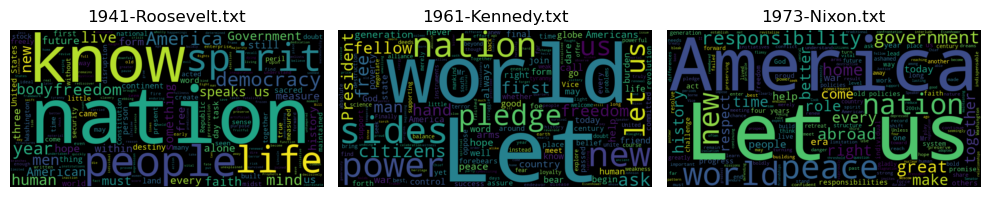

In [52]:
# Plot the word clouds
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(roosevelt_wordcloud, interpolation='bilinear')
plt.title('1941-Roosevelt.txt')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(kennedy_wordcloud, interpolation='bilinear')
plt.title('1961-Kennedy.txt')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(nixon_wordcloud, interpolation='bilinear')
plt.title('1973-Nixon.txt')
plt.axis('off')

plt.tight_layout()
plt.show()

# Refelction Report

Please reflect on all that you learnt and fill this reflection: https://docs.google.com/forms/d/e/1FAIpQLSfqHHlmJyUkniiBiejtudIuRFk_TVCLe843wfX6Iu3QNRPmng/viewform?usp=sf_link

# Rough